In [11]:
import numpy as np
import scipy.io as scio
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import os
import skimage

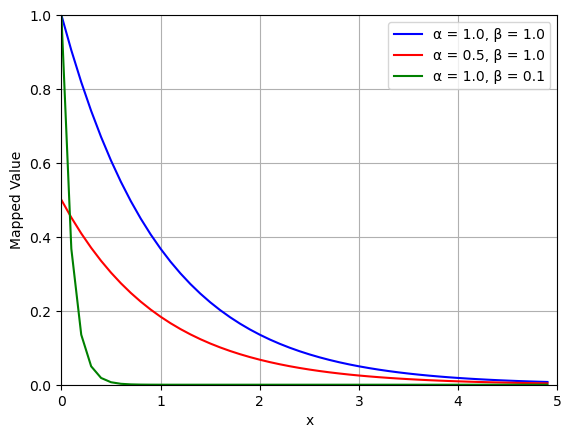

In [12]:
dt = 0.1
def lapl(a,b,t):
    return a * np.exp(-1 * t / b) 
t = np.arange(0,5,dt)

plt.figure()
plt.plot(t, lapl(1,1,t), 'b', t, lapl(.5,1,t), 'r',t, lapl(1,.1,t), 'g',)
plt.xlabel('x')
plt.ylabel('Mapped Value')
plt.grid(True)
plt.axis([0,5, 0, 1])
plt.legend(['α = 1.0, β = 1.0', 'α = 0.5, β = 1.0', 'α = 1.0, β = 0.1'])
plt.savefig('laplace_examples.png')

In [126]:
hr_df  = pd.read_csv('HR_FullTimeSeries.csv')
hr_data = hr_df.drop(['Subject', 'FinalMS', '1350'], axis=1).to_numpy()

In [127]:
hr_df

,Subject,FinalMS,0,1,2,3,4,5,6,7,...,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
0,APS_F18_33_TC1,0,91.63,91.92,92.20,92.45,92.77,93.13,93.50,93.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,APS_F18_33_TC2,0,106.85,106.73,106.58,106.78,106.93,106.95,106.88,106.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,APS_F18_33_TC3,1,76.72,76.70,76.70,76.70,76.72,76.77,76.87,76.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,APS_F19_30_TC1,1,76.00,75.75,75.47,75.20,74.90,74.67,74.72,74.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,APS_F19_30_TC2,1,79.33,79.07,78.77,78.43,78.27,78.22,78.20,78.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,APS_M31_14_TC2,2,78.42,78.45,78.48,78.50,78.48,78.43,78.37,78.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,APS_M31_14_TC3,1,74.23,74.27,74.25,74.22,74.15,74.05,73.93,73.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,APS_M34_28_TC1,1,62.18,62.05,61.95,61.90,61.88,61.98,62.07,62.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,APS_M34_28_TC2,1,58.85,58.82,58.78,58.75,58.73,58.72,58.70,58.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
hr_df_nopad = hr_df.dropna()
hr_data_nopad = hr_df_nopad.drop(['Subject', 'FinalMS', '1350'], axis=1).to_numpy()

NameError: name 'eda_data' is not defined

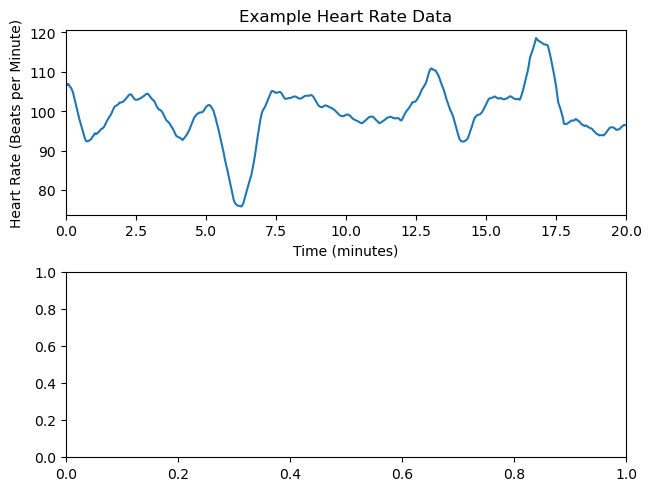

In [15]:
dt = 1/60
t = np.arange(0,20,dt)
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(t, hr_data[1,:1200])
axs[0].set_xlabel('Time (minutes)')
axs[0].set_ylabel('Heart Rate (Beats per Minute)')
axs[0].set(title = 'Example Heart Rate Data')
axs[0].set_xlim([0,20])
axs[1].plot(t, eda_data[1,:1200])
axs[1].set_xlabel('Time (minutes)')
axs[1].set_ylabel('Skin Condutance (μSiemens)')
axs[1].set(title = 'Example Skin Conductance Data')
axs[1].set_xlim([0,20])
axs[0].grid(True)
axs[1].grid(True)
plt.savefig('hreda_example.png')

In [16]:
num_subjects = hr_data.shape[0]
length = hr_data.shape[1]

In [17]:
num_subjects = hr_data.shape[0]
length = hr_data.shape[1]

In [18]:
hr_data_normalized = np.divide(hr_data - np.mean(hr_data, axis=1, keepdims=True), np.std(hr_data, axis=1, keepdims=True))
eda_data_normalized = np.divide(eda_data - np.mean(eda_data, axis=1, keepdims=True), np.std(eda_data, axis=1, keepdims=True))

In [19]:
ms_df = pd.read_csv('MS_DateTime_Complete_test.csv')

In [29]:
ms_df.head()

,Subject_Code,MSscore,M_S,Test_Condition,Age,Gender,Time
0,APS_F18_33_TC1,0.0,2,aps1_task1,18,1,2022-07-18 18:49:47.000
1,APS_F18_33_TC1,0.0,2,aps1_task1,18,1,2022-07-18 18:51:17.000
2,APS_F18_33_TC1,0.0,2,aps1_task1,18,1,2022-07-18 18:52:47.000
3,APS_F18_33_TC1,1.0,2,aps1_task1,18,1,2022-07-18 18:54:17.000
4,APS_F18_33_TC1,5.0,2,aps1_task1,18,1,2022-07-18 18:55:47.000


In [109]:
ms_interval_labels = np.ones((15, num_subjects)) * 2 # Labeing high as 2, anything not given presumed to be an early end, which corresponds to high

In [97]:
ms_interval_labels.shape


(15, 73)

In [ ]:
for su

In [88]:
subject_names = ms_df['Subject_Code'].unique()
grouped = ms_df.groupby(['Subject_Code'])
subject = 'APS_F30_27_TC1'
subj_data =  grouped.get_group(subject)
subj_ms_scores = subj_data['MSscore'].to_numpy()[1:]

In [89]:
subj_ms_scores = np.where(subj_ms_scores <=3, 0, subj_ms_scores)
subj_ms_scores = np.where((subj_ms_scores > 3) & (subj_ms_scores < 8), 1, subj_ms_scores)
subj_ms_scores = np.where((subj_ms_scores >= 8 ) , 2, subj_ms_scores)

In [128]:
i = 0
ms_interval_labels = np.ones((15, num_subjects)) * 2 # Labeing high as 2, anything not given presumed to be an early end, which corresponds to high
subject_names = hr_df['Subject'].unique() # so we only use subjects with phys data
grouped = ms_df.groupby(['Subject_Code'])

for subject in subject_names:
   
    subj_data =  grouped.get_group(subject)
    subj_ms_scores = subj_data['MSscore'].to_numpy()[1:]
    subj_ms_scores = np.where(subj_ms_scores <=3, 0, subj_ms_scores)
    subj_ms_scores = np.where((subj_ms_scores > 3) & (subj_ms_scores < 8), 1, subj_ms_scores)
    subj_ms_scores = np.where((subj_ms_scores >= 8 ) , 2, subj_ms_scores)
    
    if len(subj_ms_scores) < 15:
        subj_ms_scores = np.pad(subj_ms_scores, (0,15 - len(subj_ms_scores)), 'constant', constant_values = (2))
    if len(subj_ms_scores) > 15:
        subj_ms_scores = subj_ms_scores[:-1]
  
    ms_interval_labels[:, i] = subj_ms_scores
    
    i = i + 1
    #subj_data =  grouped.get_group(subject)
    #print(len(subj_data['MSscore'].to_numpy()))

In [132]:
ms_interval_labels.shape

(15, 73)

In [ ]:
for subject in 

In [31]:
ms_df.shape

(1174, 7)

In [20]:
full_time_distances_hr = np.empty((num_subjects, num_subjects))

In [21]:
full_time_distances_eda = np.empty((num_subjects, num_subjects))

In [22]:
for i in range(num_subjects): # Set diagonals to zero
    for j in range(num_subjects):
        full_time_distances_hr[i,j] = 1/length * np.linalg.norm(hr_data_normalized[i,:] - hr_data_normalized[j,:], ord=2) ** 2
        full_time_distances_eda[i,j] = 1/length * np.linalg.norm(eda_data_normalized[i,:] - eda_data_normalized[j,:], ord=2) ** 2
    

In [24]:
full_time_distances_hr # Without normalization, way too large 

array([[0.        , 0.22452871, 0.33571973, ..., 0.85377675, 0.58868027,
        0.59821757],
       [0.22452871, 0.        , 0.24774947, ..., 0.73181298, 0.45014951,
        0.48499529],
       [0.33571973, 0.24774947, 0.        , ..., 0.75814181, 0.4480615 ,
        0.4950865 ],
       ...,
       [0.85377675, 0.73181298, 0.75814181, ..., 0.        , 0.87871769,
        1.1515221 ],
       [0.58868027, 0.45014951, 0.4480615 , ..., 0.87871769, 0.        ,
        0.33417883],
       [0.59821757, 0.48499529, 0.4950865 , ..., 1.1515221 , 0.33417883,
        0.        ]])

We note that for HR, the distances are more skewed towards smaller values than for EDA, which has more of a spread

In [25]:
def distance_laplace(distance_mat, scale_up=2, smooth_out=1):
    # Attempt of a function w/ hyperparameters scale up and smooth out, elementwise scale_up / (x^2 + smooth_down), t
    #take reciprocal of distances to convert low distances -> higher numbers and vice versa to try and encourage learning the
    # smallest distance values. 
    # Inspired by CID metric
    
    if smooth_out < 0:
        raise ValueError("Smooth Out Can't Be Negative")
        
    if scale_up < 0:
        raise ValueError("Smooth Out Can't Be Negative")
    
    dist_mat =  scale_up * np.exp(-1 * distance_mat / smooth_out) # Laplace Distribution 
    np.fill_diagonal(dist_mat, 0) # Want diagonal to equal 0 so we try not to learn the diagonal
    
    
    
    return dist_mat

In [26]:
laplace_hr = distance_laplace(full_time_distances_hr)
laplace_eda = distance_laplace(full_time_distances_eda)

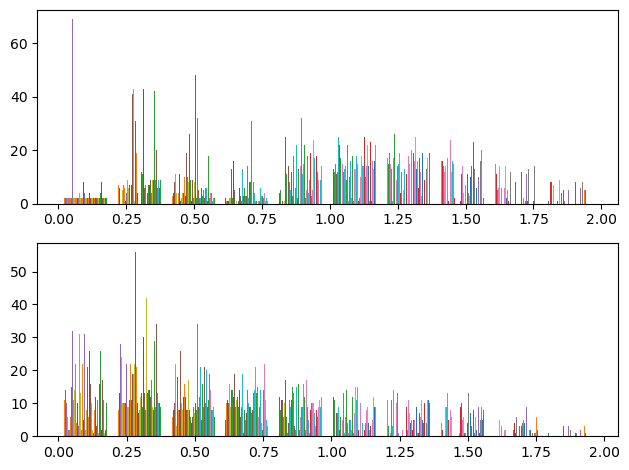

In [28]:
fig, axs = plt.subplots(2,1,tight_layout=True)
hist_hr = axs[0].hist(laplace_hr)
hist_eda = axs[1].hist(laplace_eda)

# 90s Block Windowing

In [57]:
blocks = skimage.util.view_as_blocks(hr_data_normalized, block_shape = (num_subjects, 90)) # Need 

In [67]:
blocks_raw = np.squeeze(skimage.util.view_as_blocks(hr_data, block_shape = (num_subjects, 90)) )

In [70]:
blocks_raw_eda = np.squeeze(skimage.util.view_as_blocks(eda_data, block_shape = (num_subjects, 90)) )

In [60]:
blocks = np.squeeze(blocks)

In [62]:
blocks.shape

(15, 73, 90)

In [63]:
block_variance = np.var(blocks, axis = 2)

In [68]:
block_raw_variance =  np.var(blocks_raw, axis = 2)

In [71]:
block_raw_variance_eda =  np.var(blocks_raw_eda, axis = 2)

In [65]:
block_variance.shape

(15, 73)

# HR, EDA PCA w/ same sparse component

In [73]:
# L21 proximal function 
def l21_prox(z, lam):
    """compute the proximal operator of L_21 norm with argument z and paramter lam"""
    x = z.copy()
    col_norm = np.linalg.norm(z,axis=0)
    idx = col_norm<=lam 
    idx_c = np.logical_not(idx)
    x[:,idx]=0
    x[:,idx_c]=(1-lam/col_norm[idx_c])*x[:,idx_c]
    return x

In [75]:
#ADMM Implementation of l2,1 norm-Robust PCA
def ADMM_L21(LH,LE,  S, H, E, lam, rho, niter=10): 
    '''
    Input: 
        LH:    Low Rank Component of the HR Data Matrix 
        LE:    Low Rank Component of the EDA Data Matrix 
        S:     The Sparse Component of the Data Matrix
        H:     The HR Data Matrix
        E:     The EDA Data Matrix
        lam:   The regularization term 
        rho:   Augmented Lagrangian Parameter 
        niter: Number of Iterations 

    Intermediate: 
        W:     The scaled Dual variable 

    Output: 
        LH:     The Low Rank Component of the HR Data Matrix 
        LE:     The Low Rank Component of the EDA Data Matrix 
        S:     The sparse component of the data matrix (or can be thought of as background noise)
    '''
    Y = H + E # Concession to limitations in PCA
    W = H + E- LH - LE-2*S
    for itr in range(niter):
        UH,SigH,VH = np.linalg.svd(H + E - LE - 2*S + W, full_matrices=False)
        LH = np.dot(np.dot(U,np.diag(soft(Sig,1/rho))),V)
        S = l21_prox(X-L+W, lam/rho)
        W = H + E-L-S+W
    return LH, LE, S

In [ ]:
Rho = 1 # Augmented Lagrangian Parameter intialization
#ld = 1/np.sqrt(length) # penalty term
ld = 1

LH_hat, LE_hat, noise =  ADMM_L21(LH=laplace_HR.T,LE = laplace_EDA.T, S=np.zeros(x.T.shape),H=laplace_HR.T,E = laplace_EDA.T lam=ld, rho = Rho)


print("Rank of original HR data matrix is: {}".format(np.linalg.matrix_rank(laplace_HR)))
print("Rank of original EDA data matrix is: {}".format(np.linalg.matrix_rank(laplace_EDA)))
print("Rank of low rank HR data matrix is: {}".format(np.linalg.matrix_rank(LH_hat)))
print("Rank of low rank HR data matrix is: {}".format(np.linalg.matrix_rank(LE_hat)))

ADMM approach solving the proposed Multi Robust PCA problem: 

\begin{align*}
    \min_{\mathbf H,\;\mathbf E, \mathbf S}\; \| \mathbf H \|_*+ \| \mathbf E \|_* \;+\;2\lambda \cdot \|\mathbf S\|_{2,1}, \quad\text{s.t.}\quad \mathbf Y\;=\;\mathbf H\;+\;\mathbf E\;+\; 2\mathbf S,
\end{align*}

In [ ]:
sns.heatmap(noise)

# L1 norm dictionary learning

In [25]:
hr_data_normalized.shape

(73, 1351)

In [26]:
hr_data_normalized

array([[ 0.00620499,  0.02064118,  0.03457957, ..., -4.55513316,
        -4.55513316, -4.55513316],
       [ 0.56033134,  0.55494491,  0.54821188, ..., -4.23583071,
        -4.23583071, -4.23583071],
       [-0.07915029, -0.08017656, -0.08017656, ..., -4.01589739,
        -4.01589739, -4.01589739],
       ...,
       [-0.43161961, -0.43661471, -0.44045709, ..., -2.82081167,
        -2.82081167, -2.82081167],
       [-0.46279447, -0.46434566, -0.46641392, ..., -3.50571607,
        -3.50571607, -3.50571607],
       [ 1.51789971,  1.49254605,  1.46809788, ..., -3.39799317,
        -3.39799317, -3.39799317]])